In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib
# %matplotlib widget

from rover_simulator.core import Obstacle, SensingPlanner
from rover_simulator.sensor import ImaginalSensor, NoisySensor
from rover_simulator.world import World
from rover_simulator.rover import OnlinePathPlanningRover, History, RoverAnimation
from rover_simulator.collision_detector import CollisionDetector
from rover_simulator.navigation.sensing_planner import SimpleSensingPlanner
from rover_simulator.navigation.localizer import ImaginalLocalizer, NoisyLocalizer
from rover_simulator.navigation.controller import DWAController, PathFollower, ArcPathController
from rover_simulator.navigation.mapper import GridMapper
from rover_simulator.navigation.path_planner.grid_base import DstarLite

In [2]:
world = World(end_step=200)
world.read_objects("../rover_simulator/examples/environment_complex.txt")

In [3]:
world.reset_world(reset_obstacles=False)

grid_width = 0.5
sensor = ImaginalSensor(obstacles=world.obstacles, fov=np.pi/2)
goal_pos = np.array([13, 18])

history = History(
    sensor_range = sensor.range,
    sensor_fov = sensor.fov
)
rover = OnlinePathPlanningRover(
    np.array([1.0, 2.0, 0.0]), 0.5,
    sensor=sensor,
    path_planner = DstarLite(np.array([1.0, 1.0, 0.0]), map_grid_width=grid_width, goal_pos=goal_pos),
    mapper = GridMapper(grid_size=np.array([20, 20]), grid_width=grid_width, sensor=sensor, rover_r=0.5),
    #controller = PathFollower(),
    controller=ArcPathController(rover_r=0.5),
    localizer = ImaginalLocalizer(),
    collision_detector = CollisionDetector(world.obstacles),
    sensing_planner = SimpleSensingPlanner(sense_interval_distance=9.0, sense_interval_angle=np.pi/4.5),
    history=history,
    color="black",
    goal_pos=goal_pos,
    waypoint_dist=1.0
)

rover.path_planner.set_map(rover.mapper)
rover.waypoints = rover.path_planner.calculate_path()

world.append_rover(rover)

In [4]:
world.simulate()

  0%|          | 0/200 [00:00<?, ?it/s]

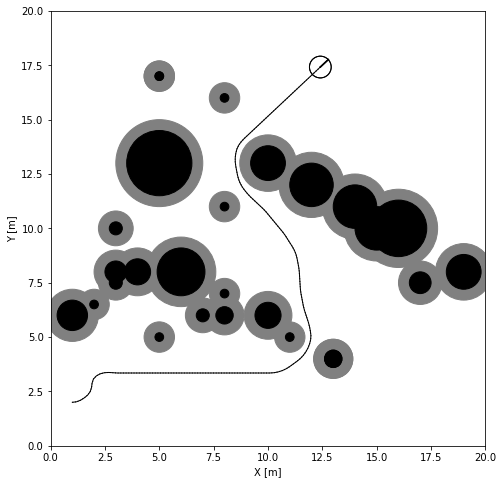

In [5]:
history.plot(
    xlim=[0, 20], ylim=[0, 20],
    obstacles=world.obstacles,
    enlarge_obstacle=rover.r,
    draw_sensing_area=False,
    draw_sensing_points=False
)

In [6]:
# history.animate(
#     xlim=[0, 20], ylim=[0, 20],
#     obstacles=world.obstacles,
#     enlarge_obstacle=rover.r, 
#     #save_path="online_path_planner.mp4",
#     debug=False
# )

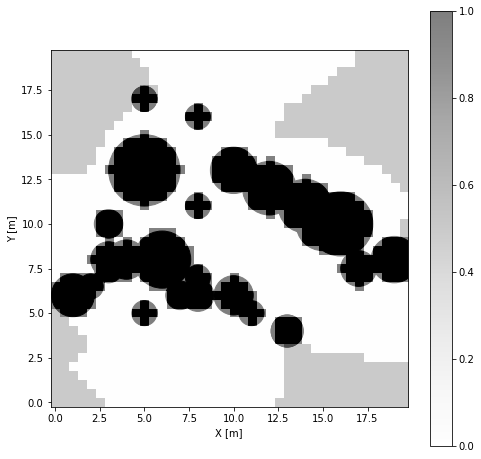

In [7]:
rover.mapper.draw_map(
    xlim=[0-rover.mapper.grid_width/2, 20-rover.mapper.grid_width/2],
    ylim=[0-rover.mapper.grid_width/2, 20-rover.mapper.grid_width/2],
    enlarge_obstacle = rover.r,
    obstacles=world.obstacles
)

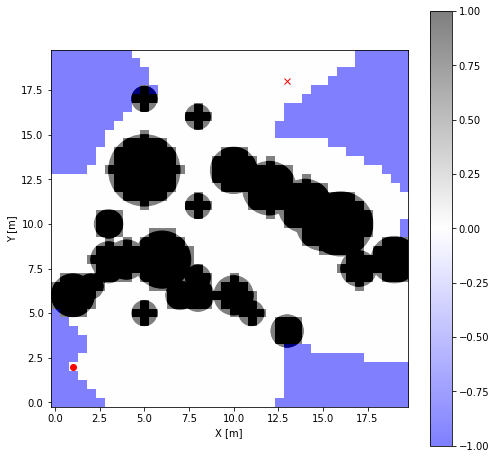

In [8]:
rover.path_planner.draw_map(
    xlim=[0-rover.path_planner.grid_width/2, 20-rover.path_planner.grid_width/2],
    ylim=[0-rover.path_planner.grid_width/2, 20-rover.path_planner.grid_width/2],
    map_name='metric',
    enlarge_obstacle=rover.r,
    obstacles=world.obstacles,
    draw_contour=False
)

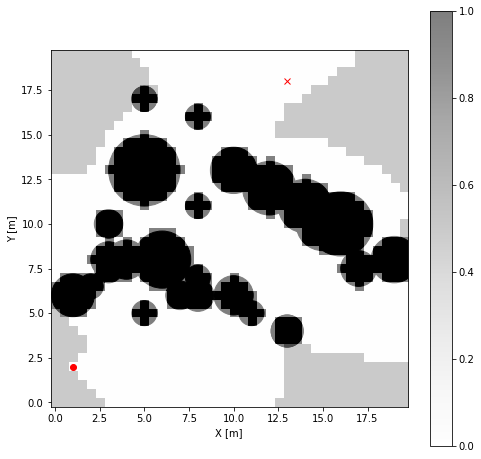

In [9]:
rover.path_planner.draw_map(
    xlim=[0-rover.path_planner.grid_width/2, 20-rover.path_planner.grid_width/2],
    ylim=[0-rover.path_planner.grid_width/2, 20-rover.path_planner.grid_width/2],
    map_name='local',
    enlarge_obstacle=rover.r,
    obstacles=world.obstacles,
    draw_contour=False
)

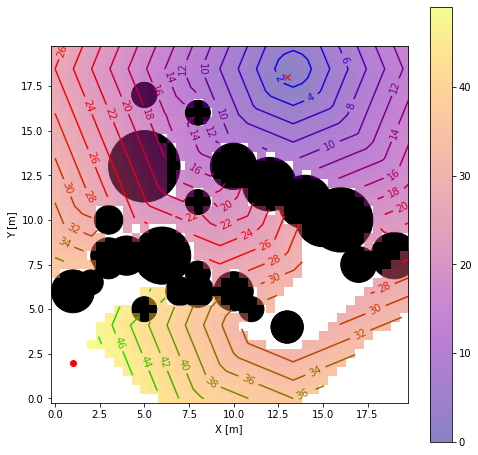

In [10]:
rover.path_planner.draw_map(
    xlim=[0-rover.path_planner.grid_width/2, 20-rover.path_planner.grid_width/2],
    ylim=[0-rover.path_planner.grid_width/2, 20-rover.path_planner.grid_width/2],
    map_name='cost',
    enlarge_obstacle=rover.r,
    obstacles=world.obstacles
)

In [11]:
# world.animate(
#     xlim=[0, 20], ylim=[0, 20],
#     enlarge_obstacle=rover.r, 
#     #save_path="online_path_planner.mp4",
#     debug=False
# )

In [12]:
# path_planner = DstarLite(np.array([1.0, 1.0, 0.0]), map_grid_width=grid_width, goal_pos=goal_pos)
# rover_animation = RoverAnimation(world, rover, path_planner)
# map_name = 'local'
# rover_animation.animate(
#     xlim=[0-rover.mapper.grid_width/2, 20-rover.mapper.grid_width/2],
#     ylim=[0-rover.mapper.grid_width/2, 20-rover.mapper.grid_width/2],
#     map_name=map_name,
#     enlarge_obstacle=rover.r, 
#     save_path="online_path_follower_" + map_name + ".mp4",
#     debug=False
# )